<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/What_can_you_do_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Predicting the future values of a time series



In [0]:
def time_series_gen(batch_size, time_steps, pred_length):
  '''
  this function will generate new time series (univariante), along with the values
  that will be used to train the model. in fact you will get batch_size number time series.
  That each one has time_step samples.

  the last Argument will be used to generate the Y labels, that is the values that you
  want to predict later.

  for example if you want to predict 10 values, you should set it ot be 10.
  in this case y will have 10 samples for each time series


  '''
  series = []
  y = []
  t = np.linspace(0,10, time_steps+pred_length)
  
  for i in range(batch_size):
    f = 1*np.random.rand()
    phi = 3*np.random.randn()
    data = np.sin(f*t + phi) + 0.3*np.random.randn(t.shape[0])
    series.append(np.expand_dims(data[:time_steps], axis=1))
    y.append(data[time_steps:])

  return np.array(series), np.array(y)



In [0]:
X, y = time_series_gen( 10000, 100, 70)

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

the orange lines shows the valuse that are going to be predicted


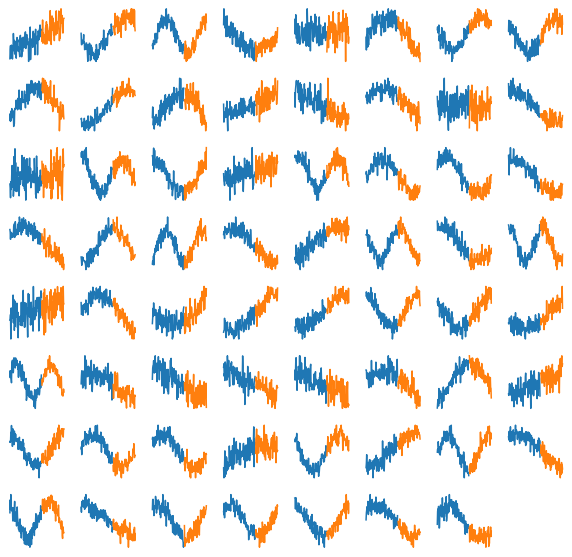

In [55]:
fig = plt.figure(figsize=(10,10))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_train[i][:,0])
  ax.plot([len(x_train[i])+ i for i in range(1, len(y_train[i])+1)],y_train[i])
  ax.axis('off')
print('the orange lines shows the valuse that are going to be predicted')

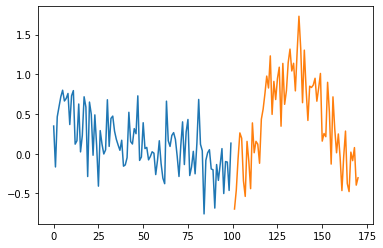

In [56]:
case =12
plt.plot(x_train[case])
plt.plot([len(x_train[case]) + i for i in range(1, len(y_test[case])+1)],y_test[case].tolist())

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True,input_shape = [None, 1]))
model.add(keras.layers.SimpleRNN(20))
model.add(keras.layers.Dense(len(y_train[0])))

In [0]:
model.compile(loss = 'MSE', optimizer= 'adam')


In [68]:
model.fit(x_train, y_train, epochs=12)

Epoch 1/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3996
Epoch 2/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3951
Epoch 3/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3259
Epoch 4/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3376
Epoch 5/12
235/235 [==============================] - 7s 31ms/step - loss: 0.3339
Epoch 6/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3302
Epoch 7/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3839
Epoch 8/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3298
Epoch 9/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3215
Epoch 10/12
235/235 [==============================] - 7s 31ms/step - loss: 0.2901
Epoch 11/12
235/235 [==============================] - 7s 31ms/step - loss: 0.2758
Epoch 12/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3119


In [0]:
pred = model.predict(x_test)

The orange lines are the actual values and the red ones are predicted values


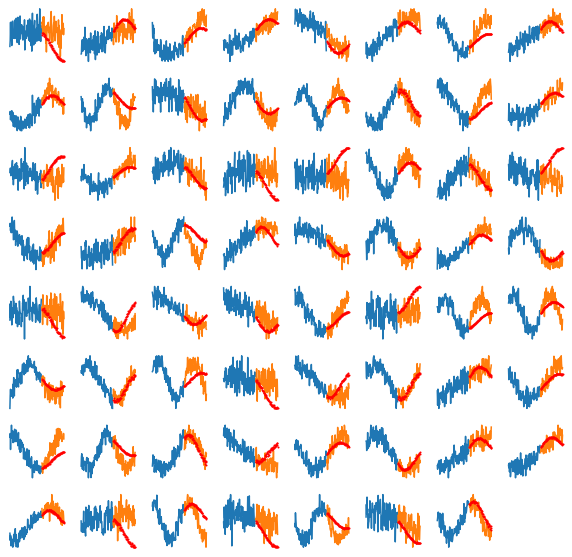

In [71]:
fig = plt.figure(figsize=(10,10))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_test[i][:,0])
  ax.plot([len(x_test[i])+ i for i in range(1, len(y_test[i])+1)],y_test[i])
  ax.plot([len(x_test[i])+ i for i in range(1, len(pred[i])+1)],pred[i], 'ro', ms=1)
  ax.axis('off')
print('The orange lines are the actual values and the red ones are predicted values')

# Another Way to train the model

In [0]:
X, y = time_series_gen( 10000, 100, 70)
y = np.expand_dims(y, axis = 2)

In [82]:
X.shape, y.shape

((10000, 100, 1), (10000, 70, 1))

In [0]:
result = np.concatenate((X,y), axis= 1)

In [84]:
result.shape

(10000, 170, 1)

In [87]:
Y = np.empty((10000, 100, 70))
Y.shape[1]

100

In [0]:
for i in range(Y.shape[2]):
  Y[:,:,i] = result[:,i+1:i+1+100,0]

In [91]:
Y.shape, X.shape

((10000, 100, 70), (10000, 100, 1))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(20, input_shape = [None, 1], return_sequences=True))
model.add(keras.layers.SimpleRNN(20, return_sequences=True))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(70)))

In [0]:
def my_metric(y_true, y_pred):
  return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])

In [0]:
model.compile(loss='MSE', optimizer='adam', metrics=[my_metric])

In [105]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
235/235 [==============================] - 8s 33ms/step - loss: 0.3658 - my_metric: 0.3366
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3267 - my_metric: 0.2825
Epoch 3/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3124 - my_metric: 0.2591
Epoch 4/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3017 - my_metric: 0.2409
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2970 - my_metric: 0.2374
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2829 - my_metric: 0.2170
Epoch 7/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2749 - my_metric: 0.2040
Epoch 8/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2723 - my_metric: 0.2038
Epoch 9/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2614 - my_metric: 0.1908
Epoch 10/20
235/235 [==============================] - 8s 33ms/step - loss: 0.2575

In [116]:
pred = model.predict(x_test)
pred.shape

(2500, 100, 70)

In [107]:
x_train.shape, y_train.shape

((7500, 100, 1), (7500, 100, 70))

(-8.450000000000001, 177.45, -1.6081146690799237, 0.9133399686645202)

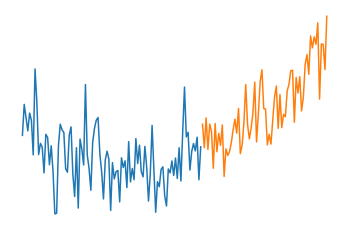

In [111]:
case=  15
plt.plot(x_train[case][:,0])
plt.plot([len(x_train[case,:,0]) + i for i in range(y_train.shape[-1])], y_train[case][-1,:])
plt.axis('off')

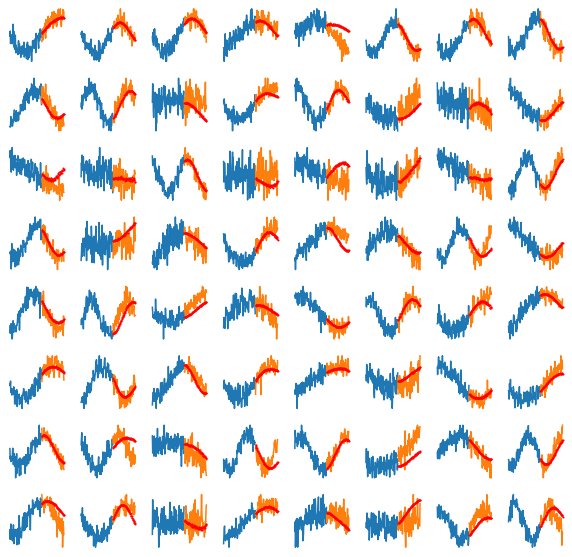

In [119]:
fig = plt.figure(figsize=(10,10))
#case = 12
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_test[i][:,0])
  ax.plot([len(x_test[i,:,0]) + i for i in range(y_test.shape[-1])], y_test[i][-1,:])
  ax.plot([len(x_test[i,:,0]) + i for i in range(y_test.shape[-1])], pred[i][-1,:], 'ro', ms=1)
  ax.axis('off')